# Лабораторная работа №1

## Подготовка

In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

Начальные значения

In [46]:
gamma_0 = 5/3
rho_0   = 1.694 * 10**(-4)
P_0     = 1.013 * 10**6
gamma_3 = 7/5
C_3     = 3.6537 * 10**4
P_3     = 1.6768 * 10**6
U_0     = 0
U_3     = 1.229 * 10**4

eps = 10**(-15)  # точность вычисления корней

In [47]:
rho_3 = P_3 * gamma_3 / C_3 ** 2

alpha_0 = (gamma_0 + 1) / (gamma_0 - 1)
n = 7  # 2 * gamma_3 / (gamma_3 - 1)
mu = (U_3 - U_0) * sqrt(((gamma_0 - 1) * rho_0) / (2 * P_0))
nu = 2 / (gamma_3 - 1) * sqrt(gamma_3 * (gamma_0 - 1) / 2 * P_3 / P_0 * rho_0 / rho_3)
X = P_3 / P_0

## Коэффициенты уравнения

In [48]:
a = [0] * 7
a[0] = X ** 2
a[1] = -alpha_0 * nu**2 * X
a[2] = 2 * alpha_0 * nu * (mu + nu) * X
a[3] = -(2 + (mu + nu)**2 * alpha_0) * X
a[4] = -nu**2
a[5] = 2 * nu * (mu + nu)
a[6] = -(mu + nu)**2 + 1

In [49]:
for i, item in enumerate(a):
    print(f"a_{i} = {item}")

a_0 = 2.739956322983837
a_1 = -12.317435484741821
a_2 = 26.292163928483856
a_3 = -17.341037715764443
a_4 = -1.86032355469398
a_5 = 3.9709509272951666
a_6 = -1.119046875904905


## Локализация корней


Уравнение: \
$f(z) = a_0 z^{14} + a_1 z^9 + a_2 z^8 + a_3 z^7 + a_4 z^2 + a_5 z + a_6 = 0$


Положительные корни. Кол-во смен знаков коэффициентов: 5 => положительных корней: 5, или 3, или 1\
Отрицательные корни. Кол-во смен знаков коэффициентов: 1 => отрицательных корней: 1

**Следствие из основной теоремы алгебры**\
Все корни многочлена $f(z)$ (включая комплексные) лежат в кольце на комплексной плоскости\
$z_{\text{min}} = \dfrac{|a_n|}{|a_n| + B} \leq |z| \leq 1 + \dfrac{A}{|a_0|} = z_{\text{max}}$, \
где $A = \max\limits_{i=1,...,n} {|a_i|}, B = \max\limits_{i=0,...,n-1} {|a_i|}$

In [50]:
A = max(a[1:])
B = max(a[:-1])
z_min = abs(a[6]) / (abs(a[6]) + B)
z_max = 1 + A / abs(a[0])
print(f"z_min = {z_min}")
print(f"z_max = {z_max}")

z_min = 0.04082442340437353
z_max = 10.595833228411268


Значит положительные корни лежат на отрезке $[0; 10.6]$, отрицательный - $[-10.6; 0]$

In [51]:
def f(z):
    return a[0] * z**14 + a[1] * z**9 + a[2] * z**8 + a[3] * z**7 + a[4] * z**2 + a[5] * z + a[6]


### Графический метод локализации корней

Положительные корни

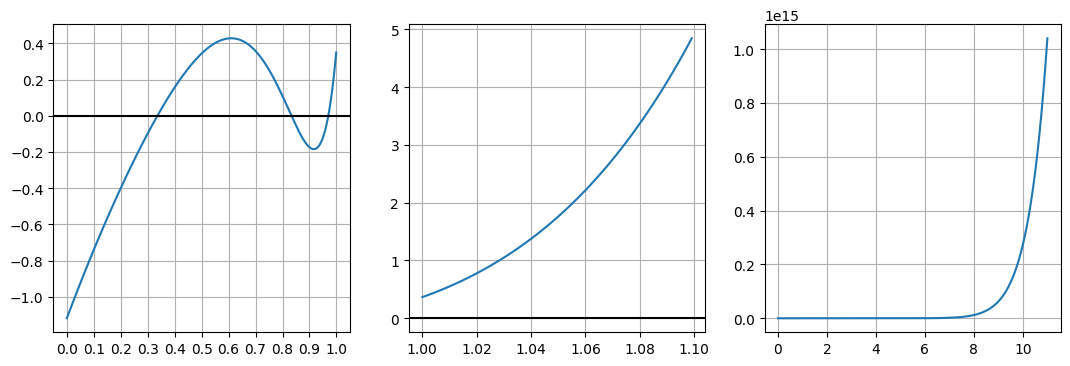

In [52]:
x_graph = np.linspace(0, 11, 11000)
y_graph = np.array([f(i) for i in x_graph])

plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1)
plt.plot(x_graph[:1000], y_graph[:1000])
plt.axhline (y=0, color='black', linestyle='-')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(x_graph[1000:1100], y_graph[1000:1100])
plt.axhline (y=0, color='black', linestyle='-')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(x_graph[:], y_graph[:])
plt.grid()

Отрицательный корень

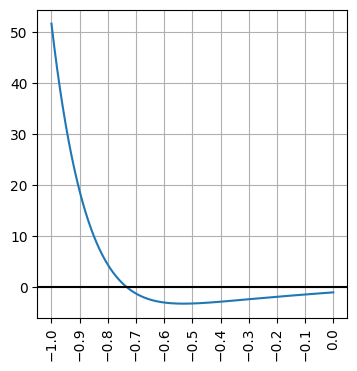

In [53]:
x_graph = np.linspace(-1, 0, 1000)
y_graph = np.array([f(i) for i in x_graph])

plt.figure(figsize=(4, 4))
plt.plot(x_graph, y_graph)
plt.axhline (y=0, color='black', linestyle='-')
plt.xticks(np.arange(-1, 0.1, 0.1), rotation = 90)
plt.grid()


**Итог:**\
С помощью графического метода удалось локализовать корни на следующих отрезках: $[-0.8; -0.7], [0.3; 0.4], [0.8; 0.9]$ и $[0.9; 1]$

### Программный метод

Разобьем отрезок, на котором находятся корни на много маленьких отрезков и вычислим в этих точках значения функции $f(z)$. Если на концах отрезка $[a; b]$ функция $f(z)$ будет принимать значения разных знаков $\left(f(a)f(b) < 0\right)$, то на этом отрезка содержится нечетное число корней функции $f(z)$.

Отрицательный корень. $z \in [-10.6; 0]$

In [54]:
roots_loc = []  # отрезки, на которых содержятся корни

z_start = -10.6
z_end = 0
z_arr = np.linspace(z_start, z_end, 10601)

f_sign_last = np.sign(f(z_arr[0]))
for i in range(1, len(z_arr), 1):
    f_sign_curr = np.sign(f(z_arr[i]))
    if f_sign_curr != f_sign_last:
        print(f"Корень на [{z_arr[i - 1]}; {z_arr[i]}]")
        roots_loc.append((z_arr[i - 1], z_arr[i]))
    f_sign_last = f_sign_curr


Корень на [-0.7349999999999994; -0.734]


Положительные корни. $z \in [0; 10.6]$

In [55]:
z_start = 0
z_end = 10.6
z_arr = np.linspace(z_start, z_end, 10601)

f_sign_last = np.sign(f(z_arr[0]))
for i in range(1, len(z_arr), 1):
    f_sign_curr = np.sign(f(z_arr[i]))
    if f_sign_curr != f_sign_last:
        print(f"Корень на [{z_arr[i - 1]}; {z_arr[i]}]")
        roots_loc.append((z_arr[i - 1], z_arr[i]))
    f_sign_last = f_sign_curr


Корень на [0.335; 0.336]
Корень на [0.833; 0.834]
Корень на [0.969; 0.97]


**Итог:**\
Программным методом были получены следующие отрезки, на которых содержатся корни: $[-0.735; -0.734], [0.335; 0.336], [0.833; 0.834]$ и $[0.969; 0.97]$\
Этот результат согласуется с графическим методом

## Уточнение корней

Уточнять корни будем с помощью метода половинного деления

In [56]:
roots_refined = []  # уточненные отрезки, на которых содержатся корни
roots = []  # корни (середины найденных отрезков)

for i in range(len(roots_loc)):
    z_start, z_end = roots_loc[i]
    f_sign_start = np.sign(f(z_start))
    l = z_end - z_start
    while l > eps:
        z_mid = (z_end + z_start) / 2
        f_sign_mid = np.sign(f(z_mid))
        if f_sign_mid == 0:
            z_start = z_mid
            z_end = z_mid
            break
        if f_sign_start == f_sign_mid:
            z_start = z_mid
        else:
            z_end = z_mid
        l = z_end - z_start
    roots_refined.append((z_start, z_end))
    roots.append((z_start + z_end) / 2)

In [57]:
for i, root in enumerate(roots):
    print(f"Корень {i + 1}: {root}")


Корень 1: -0.7347001581436872
Корень 2: 0.3358536239080808
Корень 3: 0.8331940396471587
Корень 4: 0.9697419646828043


## Пересчет результатов

Пересчитаем найденные корни $Z$ в переменные, которые были даны в исходной постановке задачи.\
$P_1 = Z^nP_3$\
$P_2 = P_1$\
$U_1 = U_3 + \dfrac{2C_3}{\gamma_3 - 1}\left[1 - \left(\dfrac{P_1}{P_3}\right)^\dfrac{\gamma_3 - 1}{2\gamma_3}\right]$\
$U_2 = U_1$\
$C_2 = C_3 \left(\dfrac{P_2}{P_3}\right)^\dfrac{\gamma_3 - 1}{2\gamma_3}$\
$D_0 = U_0 + \dfrac{P_1 - P_0}{\rho_0(U_1 - U_0)}$\
$\rho_1 = \rho_0 \dfrac{U_0 - D_0}{U_1 - D_0}$

Также произведем отбор физически верных корней.\
$a_{\text{кр}}^2 = \dfrac{P_1 - P_0}{\rho_1 - \rho_0}$\
Если выполнено следующее условие, то корень подходит:\
$\lambda_0 = \dfrac{U_0 - D_0}{a_{\text{кр}}} > 1$

In [58]:
for i, Z in enumerate(roots):
    P_1 = P_3 * Z ** n
    P_2 = P_1
    U_1 = U_3 + 2 * C_3 / (gamma_3 - 1) * (1 - np.sign(P_1 / P_3) * (abs(P_1 / P_3)) ** (1 / n))
    U_2 = U_1
    C_2 = C_3 * np.sign(P_2 / P_3) * (abs(P_2 / P_3)) ** (1 / n)
    D_0 = U_0 + (P_1 - P_0) / (rho_0 * (U_1 - U_0))
    rho_1 = rho_0 * (U_0 - D_0) / (U_1 - D_0)

    print(f"{i + 1}-й корень:")

    a_cr_2 = (P_1 - P_0) / (rho_1 - rho_0)
    if a_cr_2 > 0 and (U_0 - D_0) / sqrt(a_cr_2) > 1:
        print("Подходит")
    else:
        print("Не подходит")
        print(a_cr_2, (U_0 - D_0) / sqrt(a_cr_2))

    print(f"Z = {Z}")
    print(f"P_1 = {P_1}")
    print(f"P_2 = {P_2}")
    print(f"U_1 = {U_1}")
    print(f"U_2 = {U_2}")
    print(f"C_2 = {C_2}")
    print(f"D_0 = {D_0}")
    print(f"rho_1 = {rho_1}\n")

1-й корень:
Не подходит
7591982135.458495 0.24835704475863374
Z = -0.7347001581436872
P_1 = -193754.67875999585
P_2 = -193754.67875999585
U_1 = 329193.69839047955
U_2 = 329193.69839047955
C_2 = -26843.7396780959
D_0 = -21639.84133715505
rho_1 = 1.0448798952802394e-05

2-й корень:
Не подходит
7974829247.573274 0.500747278234549
Z = 0.3358536239080808
P_1 = 808.2236167384307
P_2 = 808.2236167384307
U_1 = 133619.58071635227
U_2 = 133619.58071635227
C_2 = 12271.083856729549
D_0 = -44717.683096917965
rho_1 = 4.2476683530086926e-05

3-й корень:
Не подходит
8892988648.63578 0.7986492043999126
Z = 0.8331940396471587
P_1 = 467416.83123670664
P_2 = 467416.83123670664
U_1 = 42762.946867058825
U_2 = 42762.946867058825
C_2 = 30442.410626588236
D_0 = -75314.73153245932
rho_1 = 0.0001080501894560511

4-й корень:
Не подходит
10634208601.909344 -1.0901158290796933
Z = 0.9697419646828043
P_1 = 1352304.8114901327
P_2 = 1352304.8114901327
U_1 = 17817.689181921905
U_2 = 17817.689181921905
C_2 = 35431.46216